Шаг 6: Восстановление битых пикселей

Полный код ячейки для выявления и восстановления битых пикселей

In [1]:
pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

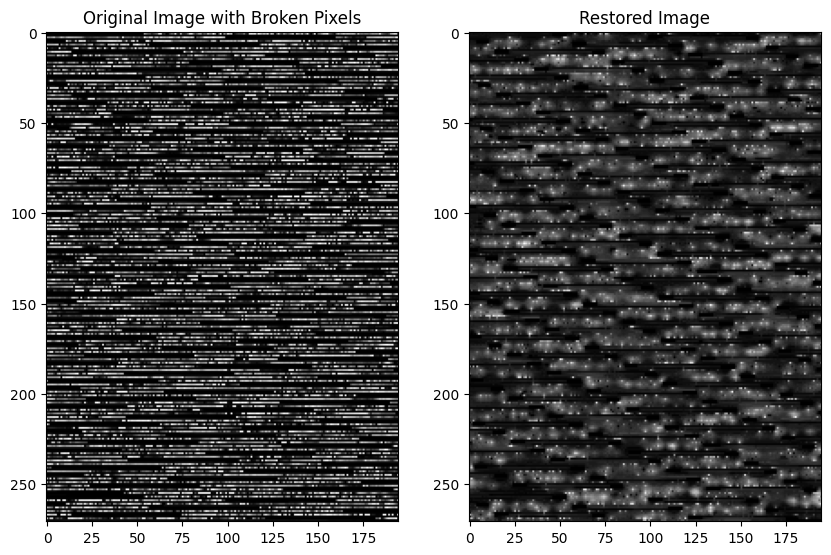

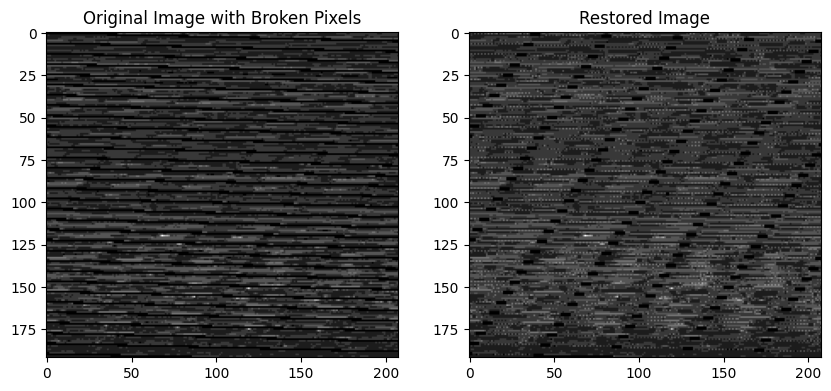

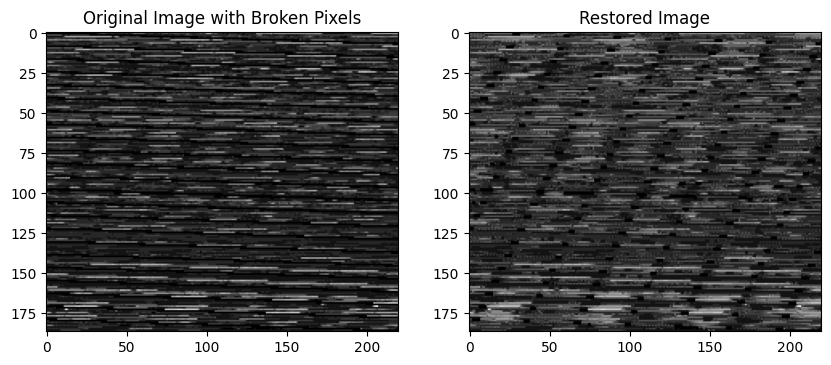

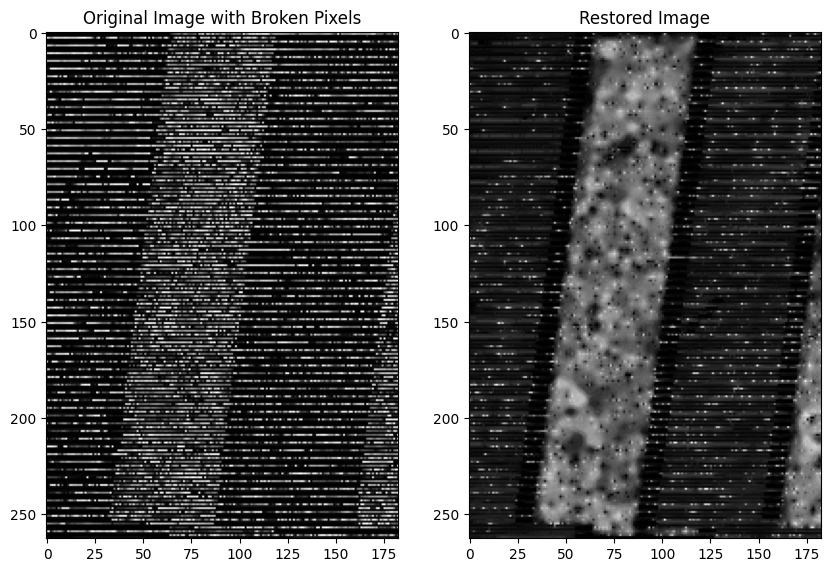

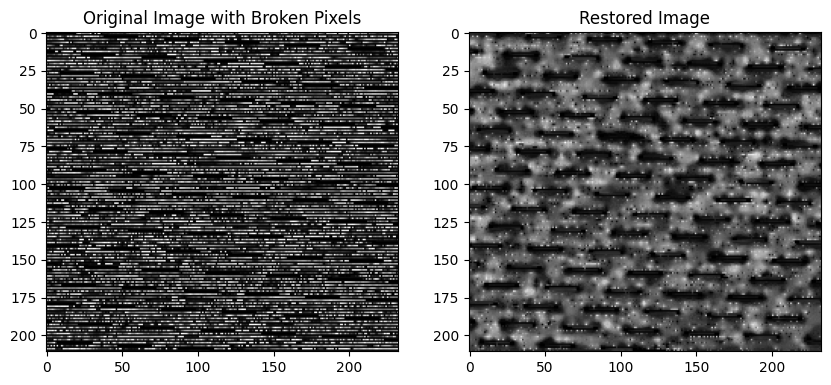

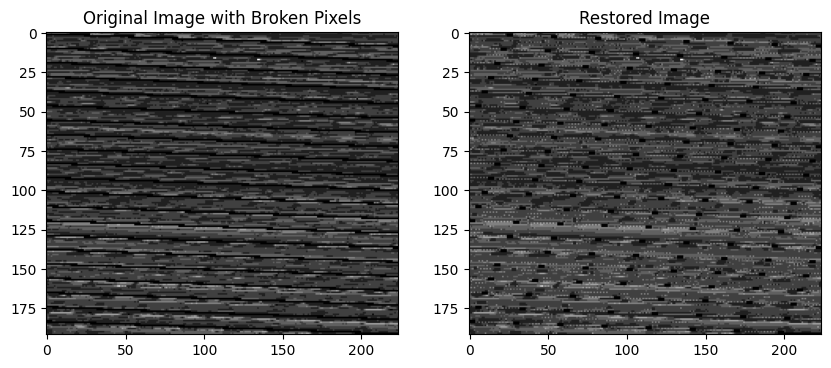

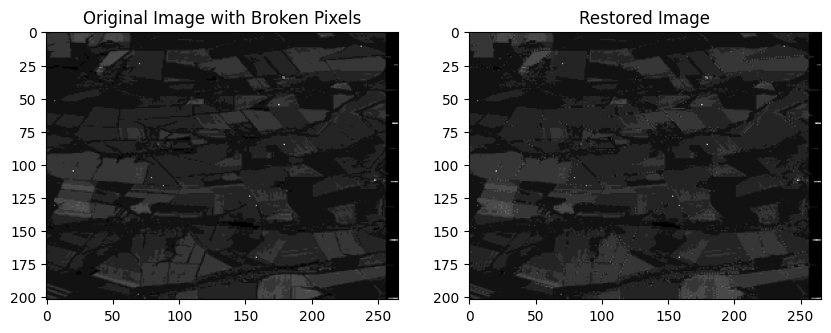

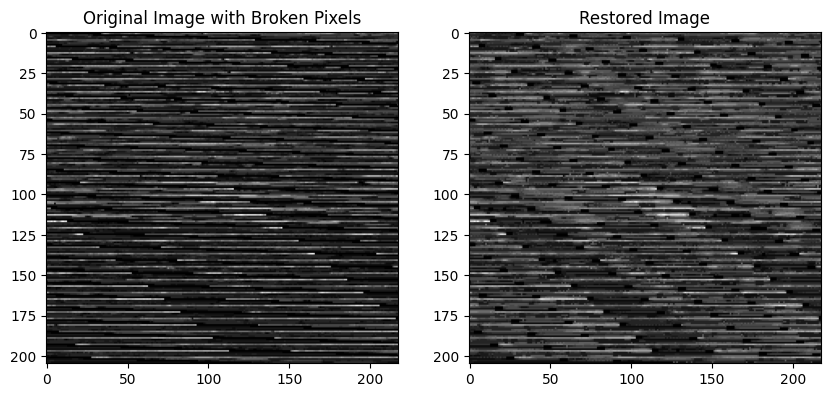

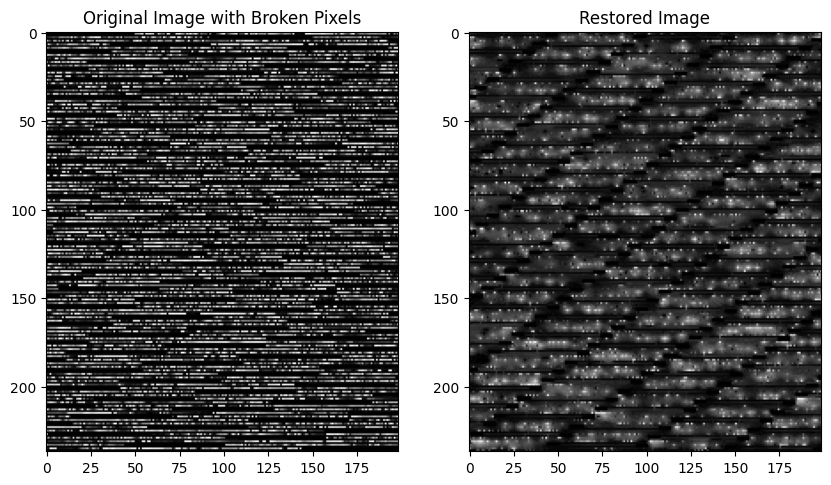

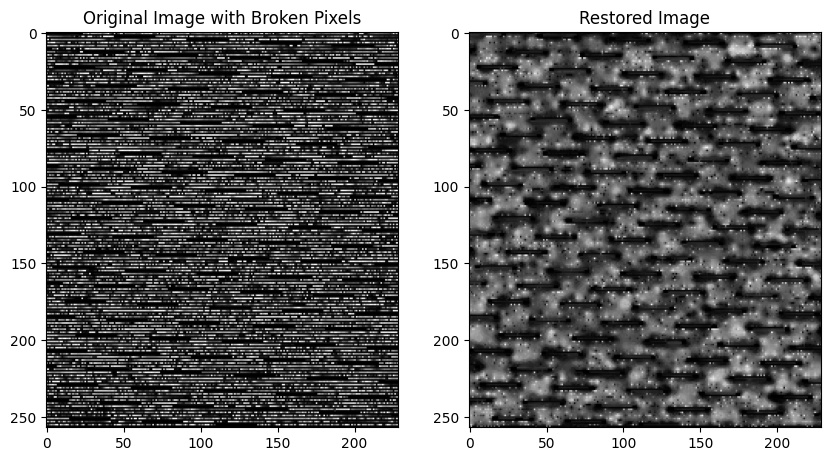

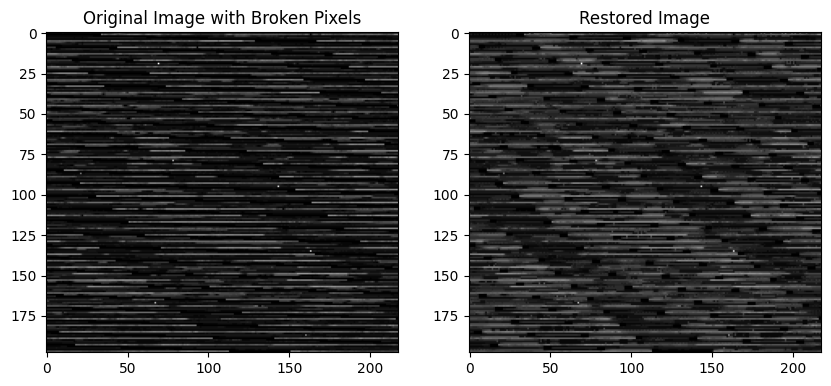

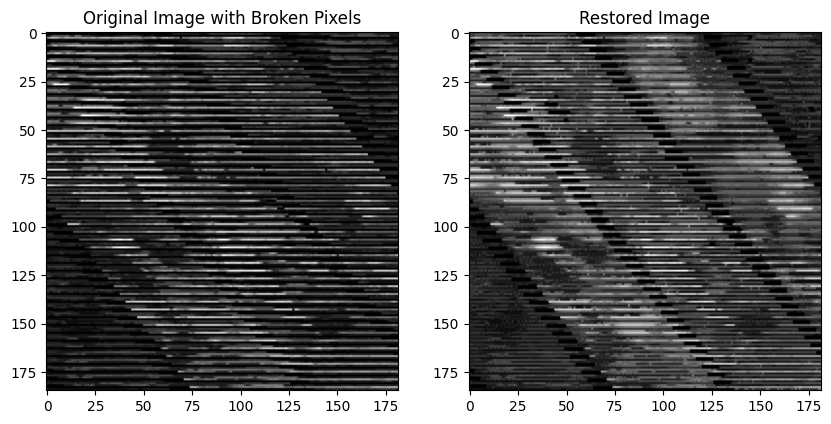

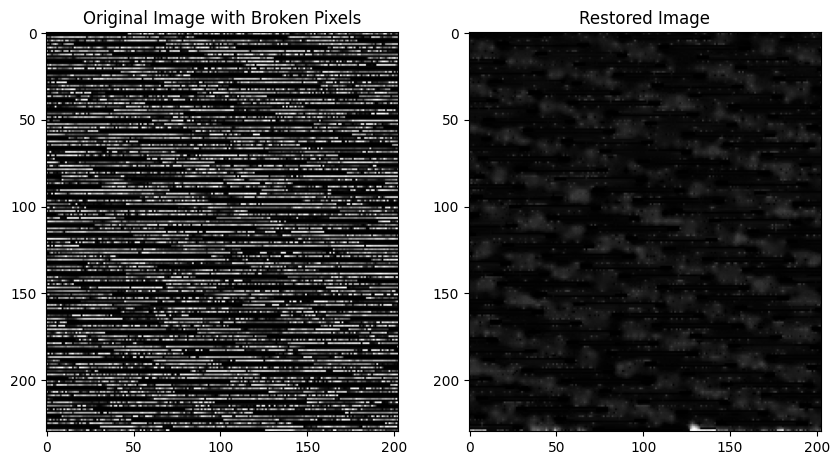

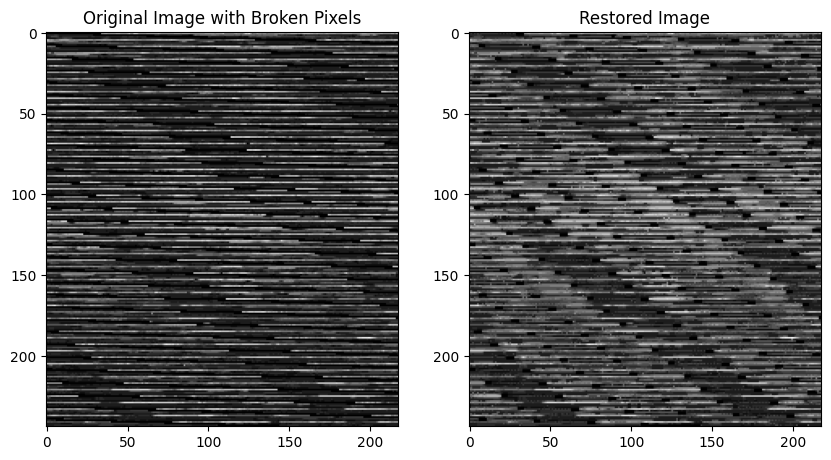

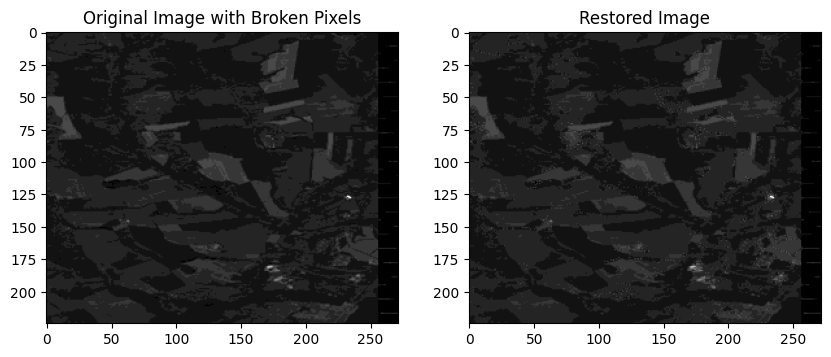

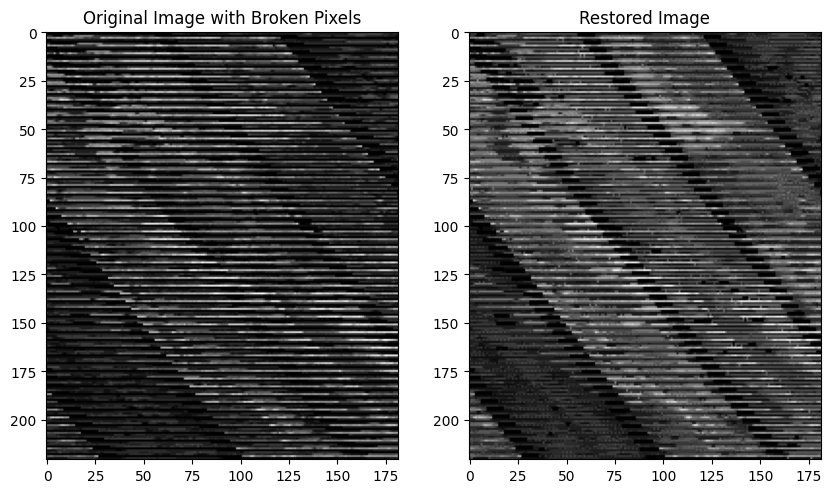

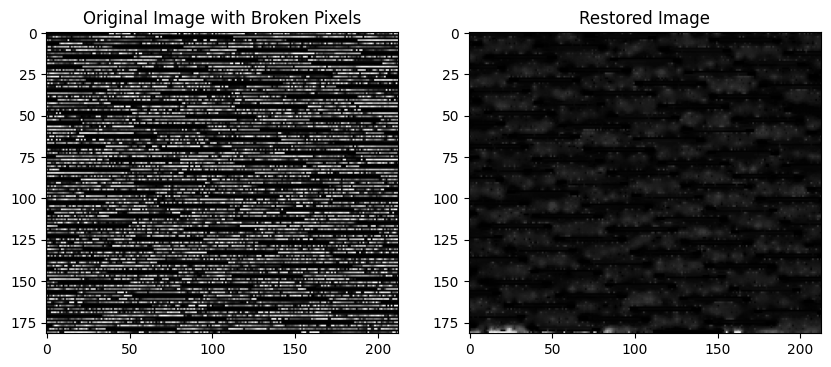

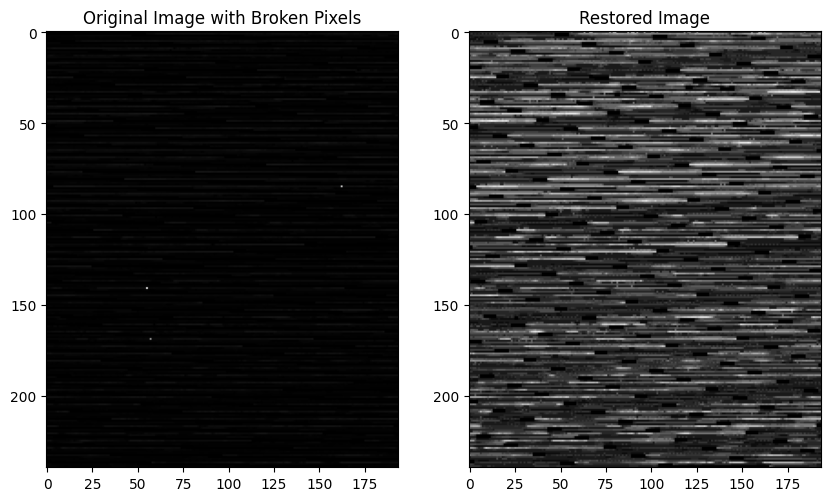

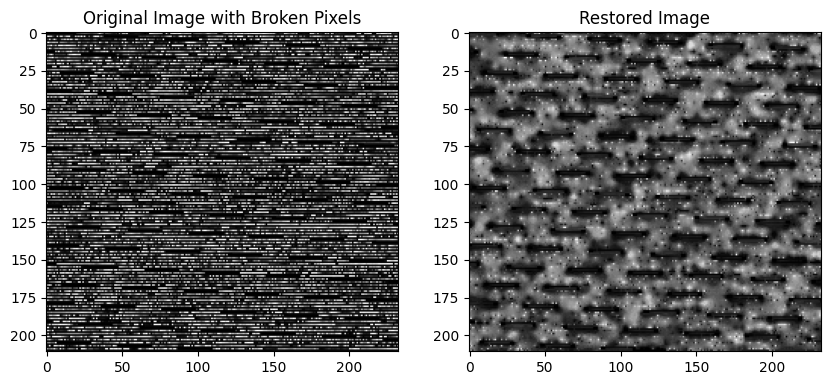

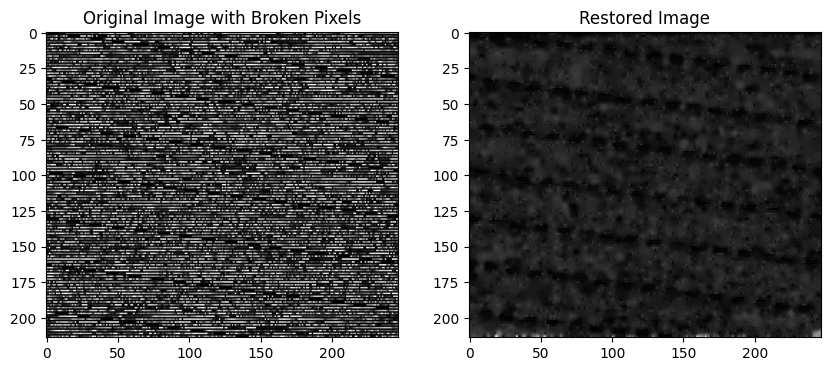

In [5]:
def detect_broken_pixels(image, threshold=50):
    """
    Обнаруживает битые пиксели на изображении.

    :param image: Входное изображение.
    :param threshold: Пороговое значение для выявления аномалий.
    :return: Маска битых пикселей.
    """
    median_filtered = cv2.medianBlur(image, 3)
    diff = np.abs(image - median_filtered)
    broken_pixels_mask = diff > threshold
    return broken_pixels_mask.astype(np.uint8)

def inpaint_broken_pixels(image, mask):
    """
    Восстанавливает битые пиксели в изображении, используя заданную маску.

    :param image: Исходное изображение с битами пикселями.
    :param mask: Маска, где битые пиксели помечены как 1, а остальные как 0.
    :return: Изображение с восстановленными пикселями.
    """
    inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    return inpainted_image

# Путь к папке с изображениями
folder_path = '/Users/penamorskaya/Downloads/1_20/'

# Получаем список файлов в папке
file_list = os.listdir(folder_path)

# Цикл для обработки каждого изображения
for filename in file_list:
    if filename.endswith('.tif'):  # Проверяем, что файл имеет нужное расширение
        # Считываем изображение
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Выявляем битые пиксели
        mask = detect_broken_pixels(image, threshold=50)

        # Восстанавливаем битые пиксели
        restored_image = inpaint_broken_pixels(image, mask)

        # Отображаем результаты
        plt.figure(figsize=(10, 10))
        plt.subplot(1, 2, 1)
        plt.title('Original Image with Broken Pixels')
        plt.imshow(image, cmap='gray')
        plt.subplot(1, 2, 2)
        plt.title('Restored Image')
        plt.imshow(restored_image, cmap='gray')
        plt.show()
